In [4]:
# for django async setting
import os
import django
import pandas as pd
import plotly.express as px
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [3]:
# all models are loaded when using shell_plus

x = Validator.objects.all()

89.00	LCT-15-1098 RB005 723K1M
83.90	LCT-15-1098 RB005 7142T
82.00	LCT-15-1098 RB005 V386
79.00	LCT-15-1098 RB005 V386
63.90	LCT-17-1336 RB005 V386
92.60	LCT-15-1098 RB005 7142T
92.56	LCT-15-1098 RB005 723K1M
91.60	SLC19V33 RB005 7142T
91.60	LCT-19-580 RB005 7142T
91.30	LCT-17-1336 RB005 7142T
84.70	SLC19V33 RB005 7142T
83.70	LCT-19-580 RB005 7142T
81.70	LCT-17-1336 RB005 7142T
81.00	LCT-17-1336 RB005 723K1M
79.90	SLC19V33 RB205 723K1M
79.00	LCT-17-1336 RB005 7142T
78.50	SLC19V33 RB005 7142T
77.60	LCT-17-1336 RB005 7142T
73.60	LCT-17-1336 RB205 723K1M


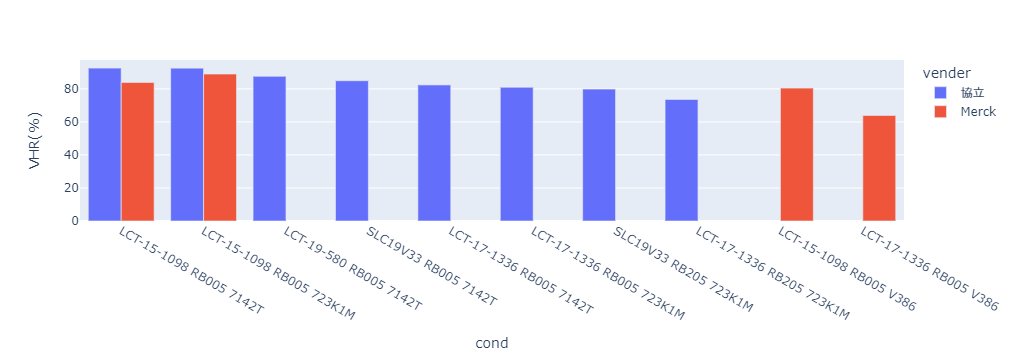

In [33]:
# bar plot of each item
import pandas as pd
VHR_query = VHR.objects.filter(value__gt=50).order_by('vender__name', '-value')
x_data = []
y_data = []
vender = []
for row in VHR_query:
    x_data += [f'{row.LC.name} {row.PI.name} {row.seal.name}']
    vender += [row.vender.name]
    y_data += [float(row.value)]
    print(f'{row.value}\t{row.LC.name} {row.PI.name} {row.seal.name}')

df = pd.DataFrame({
    'cond': x_data,
    'VHR(%)': y_data,
    'vender': vender,
})



df_mean = df.groupby(by=['vender', 'cond'], as_index=False).mean().sort_values(by=['VHR(%)'], ascending=False)

import plotly.express as px
fig = px.bar(df_mean,x='cond', y='VHR(%)', color='vender', barmode='group')
fig.show()



In [31]:
df_mean

,vender,cond,VHR(%)
0,Merck,LCT-15-1098 RB005 7142T,83.900000
1,Merck,LCT-15-1098 RB005 723K1M,89.000000
2,Merck,LCT-15-1098 RB005 V386,80.500000
3,Merck,LCT-17-1336 RB005 V386,63.900000
4,協立,LCT-15-1098 RB005 7142T,92.600000
5,協立,LCT-15-1098 RB005 723K1M,92.560000
6,協立,LCT-17-1336 RB005 7142T,82.400000
7,協立,LCT-17-1336 RB005 723K1M,81.000000
8,協立,LCT-17-1336 RB205 723K1M,73.600000
9,協立,LCT-19-580 RB005 7142T,87.650000


In [21]:
valid_val = Validati
query = VHR.objects.all()

result = pd.DataFrame.from_records(query.values(
    "LC__name",
    "PI__name",
    "seal__name",
    "value",
    "vender__name"
)).rename(
    columns={
        "LC__name": "LC",
        "PI__name": "PI",
        "seal__name": "Seal",
        "vender__name": "vender",
    }
)


# value generate by customize methods
value_remark = []
condition = []

for item in query:
    value_remark += [item.value_remark()]
    condition += [item.cond()]

result.insert(4, 'condition', condition)
result.insert(4, 'value remark', value_remark)
result

,LC,PI,Seal,value,value remark,condition,vender
0,LCT-15-1098,RB005,723K1M,89.00,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",Merck
1,LCT-15-1098,RB005,7142T,83.90,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",Merck
2,LCT-15-1098,RB005,V386,79.00,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",Merck
3,LCT-17-1336,RB005,7142T,49.50,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",Merck
4,LCT-17-1336,RB005,V386,63.90,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",Merck
5,LCT-15-1098,RB005,V386,82.00,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",Merck
6,LCT-17-1336,RB005,7142T,81.70,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",協立
7,LCT-17-1336,RB005,7142T,91.30,,"Before UV, V: 5.00 volt, freq: 0.60 Hz, Temper...",協立
8,SLC19V33,RB005,7142T,84.70,,"Before UV, V: 1.00 volt, freq: 0.60 Hz, Temper...",協立
9,SLC19V33,RB005,7142T,91.60,,"Before UV, V: 5.00 volt, freq: 0.60 Hz, Temper...",協立


In [18]:
value_remark

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']